In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "none",
        "transition": "none",
        "start_slideshow_at": "selected",
        "scroll": False
     }
)


<h1 align='center'>Data and Model Version Control: Applications in ML Drug Discovery pipelines
</h1>


<h3 align='center'>Estefania Barreto-Ojeda</h3>
<h4 align='center'>Computational Scientist <br> Cyclica Inc.</h4>

<h3 align='left'>Overview</h3>

**Part I: Biological data**
- What makes biological data different? 
- Overview ML drug discovery pipelines
- Data feedback loops: optimizing ML models.
- Challenges.

**Part II: Implementing data-versioned control in drug discovery ML pipelines**
- Introduction to DVC.
- Implementing DVC for biological data.
- Tracking data and models in drug discovery.
- Rolling back and forward through versions.
- Highlights.


<h1 align='center'>Part I: Biological Data</h1>

<br>
<h2 align='center'>Data is crucial for Machine Learning.</h2>

<br><br>
<center>
We need a lot of data.
</center>

<br>
<center>
We <b>have</b> a lot of data.
</center>
<br>
<br>

<center><h3 style="color:darkred;">Data != Information</h3><center>

 <h1 align='center'>Biological data is complex</h1>
 


<img src="img/ComplexData.png"  class='center'>

<br>
<br>
<br>


<center><h3 style="color:darkred;">Data != Information</h3><center>

<!-- Heterogenous -->


<p align="left"><img src="img/heterogeneous.png"/></p>


* Diverse formats.
* Derived from specific assays.
    
<br>
<img src="img/omics.png" align='right' width=800>
<br>

<!-- <p align="right"><img src="img/omics.png"/></p> -->

<!-- High dimensional -->

<p align="left"><img src="img/high-dim.png"/></p>
<br>

- Low number of samples (observations).
- High number of variables (features).

<br>
<img src="img/highdim_nature.png" align='right' width=700>
<br>

- Example:
    - 10,000 samples mRNA.
    - Each sample with 100 tumors.
    - 100 tumours existing in 10,000-D space. 

<center>
<h6 style="color:lightgrey;">R. Clarke et al. Nat. Rev. Cancer (2008)</h6>
</center>



<!-- Conditional -->
<p align="left"><img src="img/conditional.png"/></p>
<br>

<br>
<img src="img/practical-rec.jpg" align='right' width=600>


- Protocols are not always reproducible.
- Elusive ground truths.


- Example:
    - No standards or tools available:
        - aggregating data.
        - curating data.
    - Standardized methods available lack functionality.
    - Complex problems, complex experiments.

<center>
<h6 style="color:lightgrey;">V.L. Porubsky, et al. Cancer Cell (2020)</h6>
</center>

The literature on reproducibility agrees to a large degree that the same experiment is conducted as long as the same experimental method is followed. However, following the same method is not enough. 

Popular deep learning (and other machine learning) methods are often used to tackle classification tasks and thus require ground-truth labels for training. 

<!-- Research biased -->

<br>
<p align="left"><img src="img/biased.png"/></p>
<br>

<img src="img/covid_nature.png" align='right' width=500>

- Bias towards specific outputs.
- More data on “hot” topics.



- Example:
        
    Articles on COVID-19:

    - **2020:** +192 k
    - **2021:** +298 k
    
<center>
<h6 style="color:lightgrey;">(H. Else, Nature 2020)</h6>
</center>

<br>
<h2 align='center'>Biological data is complex</h2></text>
<br>
<br>
<div class="col-md-8" markdown="1">
<br>
<br>
</div>

<div class="col-md-8" markdown="1">

- **Dissimilar**

    →  Diverse formats and content.

<br>

- **Imbalanced**

    →  More data for given feature.
</div>


- **Redundant**

    →  Duplicated values.
    
<br>

- **Sparse**

    →  Lack annotations.
    
<br>
<br>
<center><h3 style="color:darkred;">Data != Information</h3><center>

<br>
<h2 align='center'>Biological data is complex</h2></text>
<br>


- No direct use or implementation.

- Requires curation!


<br>
<img src="img/BearTheData.png" align='center' width=490>
<br>

<center>
    <h3 style="color:darkcyan;">Data == Information
    </h3>
<center>

<br>
<h2 align='left'>ML Workflow</h2></text>
<br>
<img src="img/step1.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow</h2></text>

<img src="img/step2.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2></text>
<br>
<img src="img/step2-DD.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2></text>
<br>
<img src="img/step3.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2>
<br>
<img src="img/step4.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2>

<br>

* Keep model updated.
* Integration of new generated data.

<br><br>

<center>
<b>Flexible ML models</b>
</center>

<br>
<img src="img/experiments.png" align='center'>

<br>
<h2 align='left'>Drug Discovery Pipelines: challenges
</h2>


* Not completely defined by the code or the dataset only. 
* Changes in the dataset + data processing + code.
* ML is the set of:
    * All the possible models.
    * Every version of initial dataset and transformed dataset.
    * Associated metrics.


<img src="img/experiments-hl.png" align='center'>

<br>
<h2 align='left'>Drug Discovery Pipelines: challenges
</h2>
<br>

(1) Raw data, curated data.

(2) ML models.

(3) Metrics.

To improve prediction: More ML models and more metrics.
<h3 align='center'>How do we track all these changes?
</h3>
<br>
<img src="img/experiments-hl.png" align='center'>

<br>
<h2 align='left'>Drug Discovery Pipelines: challenges
</h2>
<br>

(1) Raw data, curated data.

(2) ML models.

(3) Metrics.

To improve prediction: More ML models and more metrics.
<h3 align='center'>How do we track all these changes?
</h3>
<br>
<img src="img/experiments-DVC.png" align='center'>

<h1 align='center'>Part II: Implementing data version control in drug discovery ML pipelines
</h1>

<h2 align='left'>What is DVC?</h2>

<u>D</u>ata <u>V</u>ersion <u>C</u>ontrol
<div class="col-md-8" markdown="1">

<img src="img/DVClogo.svg" align='left' width=150>
</div>
<br>
<div class="col-md-8" markdown="1">

* Open source.
* Compatible with git providers.
* Compatible with cloud storage providers.
* Language and framework agnostic.

**What can it do?**
* Track data and metrics.
* Version control ML projects.
* Manage ML experiments.
<br>
</div>

<br>

**What is not?**

Disney Vacation Club

<img src="img/not-dvc.jpeg" align='left' width=200>



**Installing DVC**

<br>

```bash

pip install dvc


```

- Choose your cloud provider:
    `[s3]`, `[gdrive]`, `[gs]`, `[azure]`, etc. 

- Use `[all]` to include them all.

<br>

For this talk, cloud provider is Google Cloud: `dvc[gs]`


```bash

pip install "dvc[gs]"


```

In [1]:
! pip install "dvc[gs]"

**Initialize DVC**

DVC works best with Git repos.

```bash

dvc init


```

In [3]:
! mkdir /tmp/tmp_demo3
! cd /tmp/tmp_demo3 && git init  &&  dvc init

mkdir: cannot create directory ‘/tmp/tmp_demo3’: File exists
Initialized empty Git repository in /tmp/tmp_demo3/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


At DVC initialization, a new `.dvc/` directory is created for configuration:

In [4]:
! ls -a ./ | grep "^\."

.
..
.dvc
.git
.ipynb_checkpoints


**Set remote**

```bash

dvc remote add <remote_name> <url>


```

In [8]:
! dvc remote add test gs://cyc-dvc-storage/test
! cat ./.dvc/config

['remote "test"']
    url = gs://cyc-dvc-storage/test


In [9]:
! dvc remote list

test	gs://cyc-dvc-storage/test


In [10]:
! dvc remote default

No default remote set


In [11]:
! dvc remote default test
! dvc remote default

test


In [12]:
! cat ./.dvc/config   # To get/set DVC configuration options.

[core]
    remote = test
['remote "test"']
    url = gs://cyc-dvc-storage/test


To start tracking a file or directory, use `dvc add`:

```bash

dvc add data/file_with_data.csv


```

In [21]:
! echo "This  is a test file." >./data/simple_echo.csv
! ls ./data
! dvc add ./data/simple_echo.csv

simple_echo.csv  simple_echo.csv.dvc
                                                                          ⠋ Checking graph
Adding...                                                                       
!
  0% Checking cache in '/home/estefaniaojeda/python_playground/dvc-dd-pipelines/
                                                                                
!
  0%|          |c9dae10b89d3cd7b3f76497cafb53c     0.00/? [00:00<?,        ?B/s]
  0%|          |c9dae10b89d3cd7b3f76497cafb53c  0.00/22.0 [00:00<?,        ?B/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 24.71file/s]

To track the changes with git, run:

	git add data/simple_echo.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


1. `dvc add`

1.1. `dvc add` --> `*.dvc` (Metadata)

In [22]:
! ls ./data/

simple_echo.csv  simple_echo.csv.dvc


In [23]:
! cat ./data/simple_echo.csv.dvc

outs:
- md5: dec9dae10b89d3cd7b3f76497cafb53c
  size: 22
  path: simple_echo.csv


1.2. `dvc add` --> `.dvc/cache` (Cache MD5 hash).

What just happened?

```

.dvc/cache

|
└── XY

    |
    └── abcdefghijk1234567890....f


```

In [24]:
cat ./.dvc/cache/de/c9dae10b89d3cd7b3f76497cafb53c

This  is a test file.


1.3. `dvc add` --> `.gitignore` (ignore data files).

For files/directories to be excluded.

In [25]:
! cat ./data/.gitignore

/simple_echo.csv


In [26]:
! rm data/simple_echo.csv.dvc data/simple_echo.csv

1. `dvc add`:

- generate dvc file
- store cache
- ignore data files


2. Track `.dvc` files with git!

```bash

git add data/simple_echo.csv.dvc data/.gitignore

git commit -m "Add sample data. Initial version."


```

<h2 align='left'>Implementing DVC in Drug Discovery Pipelines
</h2>
<br>

1. Set up:
    
    - Install
    - Initialize
    - Set remote storage
    - Test adding files


2. Data versioning and model versioning.
3. Rolling backward/forward.
4. Highlights

<h2 align='left'>Data versioning and model versioning.</h2>
<br>

**Drug Discovery Pipelines: challenges**

(1) Raw data, curated data.

(2) ML models.

(3) Metrics.


<br>
<img src="img/experiments-DVC.png" align='center' width=1100>


<h2 align='left'>Data versioning and model versioning.</h2>
<br>



Example pipeline:
1. Featurization
2. Preparation
3. Training
4. Metrics

**Record and reproduce all the steps to transform data to models.**

Initial data --> `/data/clean_data.csv`

<h2 align='left'>Data versioning and model versioning.</h2>
<br>

**EDA**


In [29]:
import pandas as pd
data = pd.read_csv('./data/initial_data.csv')
data.head()

,smiles,class
0,C=1([C@@H](C(=C(C)NC1C)C(OC)=O)c1cc(ccc1)[N+](...,1
1,C1(\c2c(CCc3c1cccc3)cccc2)=C\CCN(C)C,1
2,c1(c2c(cccc2)oc1CCCC)C(c1cc(c(OCCN(CC)CC)c(c1)...,1
3,[H][C@H]1CC[C@@H](C#N)C1C(=O)C3CN(C(C)c2ccc(C#...,1
4,[nH]1ccnc1-c2ccc(cc2)OCCCN3CCCCC3,1


In [30]:
data['smiles'][1]

'C1(\\c2c(CCc3c1cccc3)cccc2)=C\\CCN(C)C'

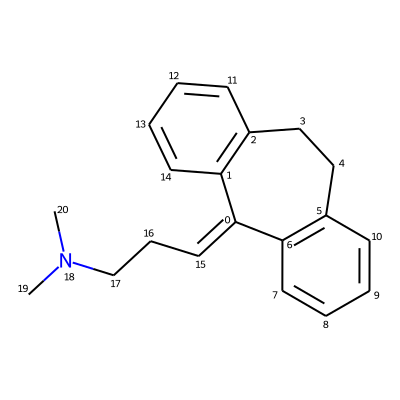

In [31]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400,400

mol = Chem.MolFromSmiles(data['smiles'][1])
mol

<h2 align='left'>Data versioning and model versioning.</h2>
<br>


In [ ]:
mol

In [ ]:
import pubchempy as pcp

id_ = pcp.get_compounds(data['smiles'][1], 'smiles')[0]
id_.synonyms[0]

In [ ]:
labels, smiles = data['class'], data['smiles']
print(labels.shape, smiles.shape)

<h2 align='left'>Data versioning and model versioning.</h2>
<br>

**Before goind further: Version initial data!**

In [2]:
! dvc dag

In [3]:
! dvc add data/initial_data.csv

⠋ Checking graphph                                                 
Adding...                                                                       
!
  0% Checking cache in '/home/estefaniaojeda/python_playground/dvc-dd-pipelines/
                                                                                
!
  0%|          |Transferring                          0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |ebaa5b4c9a71ce8eb02a27eaff1ce0     0.00/? [00:00<?,        ?B/s]
  0%|          |ebaa5b4c9a71ce8eb02a27eaff1ce0  0.00/228k [00:00<?,        ?B/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 21.25file/s]

To track the changes with git, run:

	git add data/initial_data.csv.dvc data/.gitignore

To enable auto staging, run:

	dvc config core.autostage true


<h2 align='left'>Data versioning and model versioning.</h2>
<br>

**1. Featurization.**

Calculate chemical descriptors. Used for prediction.

Standard:

```python

from src.utils import get_descriptors

df_process = get_descriptors(smiles)

df_process.to_csv("./data/featurized/featurized_data.csv") ...


```

Better:    
```


python src/featurize.py data/clean_data.csv data/featurized_data.csv


```

Or much better: Adding parameters from YAML file.

```python

import yaml

params = yaml.safe_load(open("params.yaml"))["featurize"]

max_number = params["max_number"]


```

<h2 align='left'>Data versioning and model versioning.</h2>
<img src="img/DVClogo.svg" align='left' width=80>

In [16]:
! dvc stage add -n featurize --force\
                -p featurize.max_number \
                -d src/featurize.py -d data/initial_data.csv \
                python src/featurize.py data/initial_data.csv data/featurized/
                

Modifying stage 'featurize' in 'dvc.yaml'                             core>

To track the changes with git, run:

	git add dvc.yaml

To enable auto staging, run:

	dvc config core.autostage true


In [17]:
! head dvc.yaml

stages:
  featurize:
    cmd: python src/featurize.py data/initial_data.csv data/featurized/
    deps:
    - data/initial_data.csv
    - src/featurize.py
    params:
    - featurize.max_number



<h2 align='left'>Data versioning and model versioning.</h2>
<br>
Run Featurization

In [18]:
! dvc repro #takes some time

'data/initial_data.csv.dvc' didn't change, skipping                   core>
Stage 'featurize' didn't change, skipping
Data and pipelines are up to date.


In [33]:
! dvc add data/featurized/featurized_data.csv

⠋ Checking graph                                                 
Adding...                                                                       
!
  0% Checking cache in '/home/estefaniaojeda/python_playground/dvc-dd-pipelines/
                                                                                
!
  0%|          |416fd56f6a4794d3fc857bb46e643b     0.00/? [00:00<?,        ?B/s]
  0%|          |416fd56f6a4794d3fc857bb46e643b 0.00/3.09M [00:00<?,        ?B/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 35.23file/s]

To track the changes with git, run:

	git add data/featurized/.gitignore data/featurized/featurized_data.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


DVC represents a pipeline internally as a graph:
 - nodes are stages.   
 - edges are directed dependencies.

In [34]:
! dvc dag

+---------------------------+  
| data/initial_data.csv.dvc |  
+---------------------------+  
              *                
              *                
              *                
        +-----------+          
        | featurize |          
        +-----------+          
+-----------------------------------------+  
| data/featurized/featurized_data.csv.dvc |  
+-----------------------------------------+  
                      *                      
                      *                      
                      *                      
                +---------+                  
                | process |                  
                +---------+                  


<h2 align='left'>Data versioning and model versioning.</h2>
<br>

✅ Featurization

**2. Processing**

- Remove features that do not provde information.
- Remove features that are highly correlated.

Standard:

```python

from src.utils import remove_zeros, filter_correlation

descriptors_df = remove_zeros(featurized_data, threshold=0)

filtered_data = filter_correlation(descriptors_df, filter_by=0.95) ...


```

Better:    
```


python src/process.py data/featurized_data.csv data/processed_data.csv


```

- Using YAML:
    - `threshold`
    - `filter_by`

<h2 align='left'>Data versioning and model versioning.</h2>
<img src="img/DVClogo.svg" align='left' width=80>

In [42]:
! dvc stage add -n process --force \
                -p process.threshold,process.filter_by \
                -d src/process.py -d data/featurized/featurized_data.csv \
                python src/process.py data/featurized/featurized_data.csv data/processed/processed_data.csv

Modifying stage 'process' in 'dvc.yaml'                               core>

To track the changes with git, run:

	git add dvc.yaml

To enable auto staging, run:

	dvc config core.autostage true


In [43]:
! tail -8 dvc.yaml

  process:
    cmd: python src/process.py data/featurized/featurized_data.csv data/processed/processed_data.csv
    deps:
    - data/featurized/featurized_data.csv
    - src/process.py
    params:
    - process.filter_by
    - process.threshold


In [44]:
! dvc repro

'data/featurized/featurized_data.csv.dvc' didn't change, skipping     core>
Running stage 'process':
> python src/process.py data/featurized/featurized_data.csv data/processed/processed_data.csv
Removing 221 features.
Removing column AUTOCORR2D_11
Removing column AUTOCORR2D_13
Removing column AUTOCORR2D_15
Removing column AUTOCORR2D_17
Removing column AUTOCORR2D_170
Removing column AUTOCORR2D_171
Removing column AUTOCORR2D_172
Removing column AUTOCORR2D_173
Removing column AUTOCORR2D_174
Removing column AUTOCORR2D_175
Removing column AUTOCORR2D_18
Removing column AUTOCORR2D_19
Removing column AUTOCORR2D_2
Removing column AUTOCORR2D_20
Removing column AUTOCORR2D_21
Removing column AUTOCORR2D_22
Removing column AUTOCORR2D_25
Removing column AUTOCORR2D_26
Removing column AUTOCORR2D_27
Removing column AUTOCORR2D_28
Removing column AUTOCORR2D_29
Removing column AUTOCORR2D_30
Removing column AUTOCORR2D_31
Removing column AUTOCORR2D_33
Removing column AUTOCORR2D_35
Removing column AUTOCORR2D_

In [45]:
! dvc add data/processed/processed_data.csv

⠋ Checking graph                                                 
Adding...                                                                       
!
  0% Checking cache in '/home/estefaniaojeda/python_playground/dvc-dd-pipelines/
                                                                                
!
  0%|          |Transferring                          0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |cb20aed4d996f59c8a8bfe63ef7cb1     0.00/? [00:00<?,        ?B/s]
  0%|          |cb20aed4d996f59c8a8bfe63ef7cb1 0.00/0.98M [00:00<?,        ?B/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 31.86file/s]

To track the changes with git, run:

	git add data/processed/processed_data.csv.dvc data/processed/.gitignore

To enable auto staging, run:

	dvc config core.autostage true


In [46]:
! dvc dag 

+---------------------------+  
| data/initial_data.csv.dvc |  
+---------------------------+  
              *                
              *                
              *                
        +-----------+          
        | featurize |          
        +-----------+          
+-----------------------------------------+  
| data/featurized/featurized_data.csv.dvc |  
+-----------------------------------------+  
                      *                      
                      *                      
                      *                      
                +---------+                  
                | process |                  
                +---------+                  
+---------------------------------------+  
| data/processed/processed_data.csv.dvc |  
+---------------------------------------+  


<h2 align='left'>Data versioning and model versioning.</h2>


✅ Featurization

✅ Processing

**3. Training**

```python
from src.get_prediction import get_pipeline, predict

pipe = get_pipeline(filtered_data, labels)

y_predict = predict(pipe, X_train, y_train, method="predict") ...


```

In [50]:
! dvc stage add -n train --force \
                -p train.split,train.seed,train.n_est,train.method \
                -d src/process.py -d data/processed/processed_data.csv \
                python src/train.py data/processed/processed_data.csv models/model.pkl 

Modifying stage 'train' in 'dvc.yaml'                                 core>

To track the changes with git, run:

	git add dvc.yaml

To enable auto staging, run:

	dvc config core.autostage true


In [52]:
! dvc repro

'data/initial_data.csv.dvc' didn't change, skipping                   core>
Stage 'featurize' didn't change, skipping
'data/featurized/featurized_data.csv.dvc' didn't change, skipping
Stage 'process' didn't change, skipping
'data/processed/processed_data.csv.dvc' didn't change, skipping
Running stage 'train':
> python src/train.py data/processed/processed_data.csv models/model.pkl
Traceback (most recent call last):
  File "src/train.py", line 76, in <module>
    with open(output_model, "wb") as fd:
FileNotFoundError: [Errno 2] No such file or directory: 'models/model.pkl'
ERROR: failed to reproduce 'train': failed to run: python src/train.py data/processed/processed_data.csv models/model.pkl, exited with 1


In [ ]:
! tail dvc.yaml

<h2 align='left'>Data versioning and model versioning.</h2>
<br>

✅ Featurization

✅ Processing

✅ Training

DVC represents a pipeline internally as a graph:
 - nodes are stages.
 - edges are directed dependencies.

In [ ]:
! dvc dag --outs

<h1 align='center'>Acknowledgments<br></h1>

**Cyclica:**
- Stephen MacKinnon
- Ali Madani
- Steve Constable
- Maria Elena Garcia
- Federico Comitani
- Daniella Lato

<h2 align='center'>Thanks!<br></h2>

<h2 align='center'>Questions?<br></h2>